# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Additional Libraries
from scipy.stats import linregress
import requests
import time
import datetime
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
units = "imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         # Create endpoint URL with each city
        city_url = base_url + city
        response = requests.get(city_url)
        

        status_code = response.status_code
        
        if status_code == 200:
            data = response.json()
        else:
            data = {} #failed request

        coord = data.get("coord", {})
        main = data.get("main", {})
        
        # Parse the JSON and retrieve data
        city_weather =  main.get("temp")# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = coord.get("lat") # YOUR CODE HERE
        city_lng = coord.get("lon") # YOUR CODE HERE
        city_max_temp = main.get("temp_max") # YOUR CODE HERE
        city_humidity = main.get("humidity") # YOUR CODE HERE
        city_clouds = data.get("clouds",{}).get("all") # YOUR CODE HERE
        city_wind = data.get("wind",{}).get("speed") # YOUR CODE HERE
        city_country = data.get("sys",{}).get("country") # YOUR CODE HERE
        city_date = data.get("dt",{}) # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e) # Shows the error code for each city
        pass

    time.sleep(1)
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mariental
Processing Record 3 of Set 1 | mae hong son
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | tiruchchendur
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | yeraliyev
Processing Record 12 of Set 1 | vuktyl
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | susanville
Processing Record 18 of Set 1 | aswan
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | blackmans bay
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          606
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          606
dtype: int64

In [5]:
city_data_df = city_data_df.dropna(how='any')

city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,70.92,69.0,100.0,4.00,US,1716905893
1,mariental,-24.6333,17.9667,80.85,18.0,40.0,2.30,NA,1716906709
2,mae hong son,19.3003,97.9685,76.66,97.0,100.0,2.01,TH,1716906710
3,edinburgh of the seven seas,-37.0676,-12.3116,54.91,59.0,12.0,19.42,SH,1716906711
4,tiruchchendur,8.4833,78.1167,85.08,68.0,100.0,10.63,IN,1716906712


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,70.92,69.0,100.0,4.00,US,1716905893
1,mariental,-24.6333,17.9667,80.85,18.0,40.0,2.30,NaN,1716906709
2,mae hong son,19.3003,97.9685,76.66,97.0,100.0,2.01,TH,1716906710
3,edinburgh of the seven seas,-37.0676,-12.3116,54.91,59.0,12.0,19.42,SH,1716906711
4,tiruchchendur,8.4833,78.1167,85.08,68.0,100.0,10.63,IN,1716906712


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

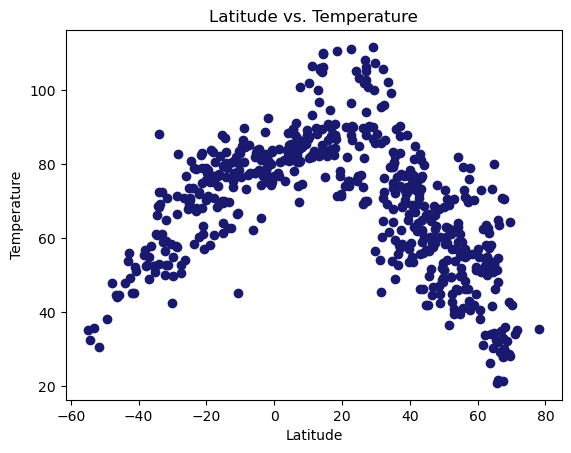

<Figure size 640x480 with 0 Axes>

In [37]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.title("Latitude vs. Temperature")
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, color="midnightblue")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

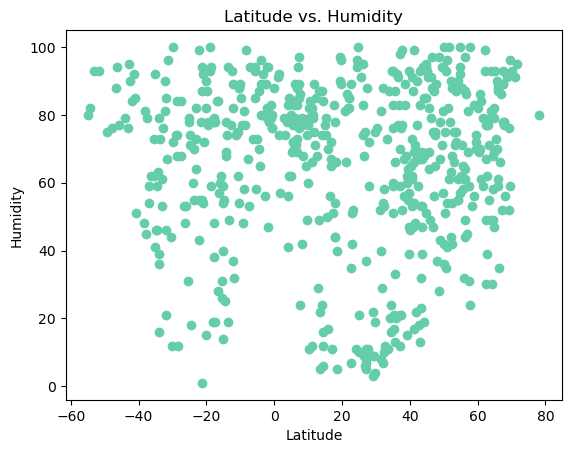

<Figure size 640x480 with 0 Axes>

In [16]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.title("Latitude vs. Humidity")
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, color = "mediumaquamarine")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

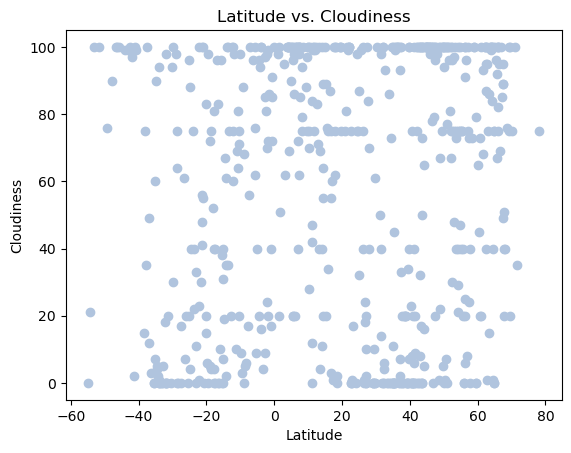

<Figure size 640x480 with 0 Axes>

In [18]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.title("Latitude vs. Cloudiness")
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, color = "lightsteelblue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

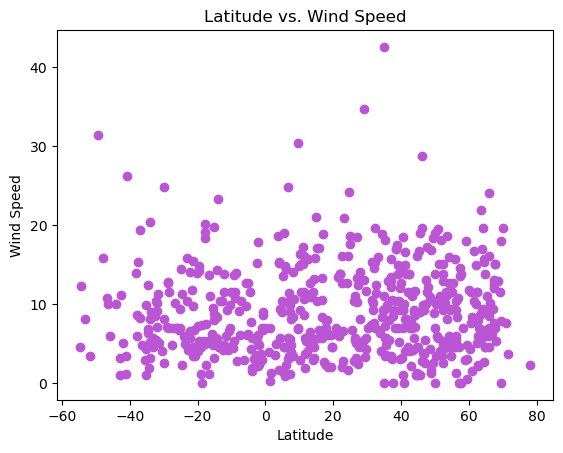

<Figure size 640x480 with 0 Axes>

In [20]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.title("Latitude vs. Wind Speed")
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, color = "mediumorchid")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values, y_values, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Add annotation for the regression line equation
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Add annotation for the r-squared value
    plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (min(x_values), min(y_values) + 10), fontsize=12, color="red")
    
    # Set labels for the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Show the plot
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df["Lat"] > 0].reset_index()

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,albany,42.6001,-73.9662,70.92,69.0,100.0,4.00,US,1716905893
1,2,mae hong son,19.3003,97.9685,76.66,97.0,100.0,2.01,TH,1716906710
2,4,tiruchchendur,8.4833,78.1167,85.08,68.0,100.0,10.63,IN,1716906712
3,8,tiksi,71.6872,128.8694,35.35,95.0,35.0,3.65,RU,1716906227
4,10,yeraliyev,43.2000,51.6500,81.14,23.0,100.0,11.01,KZ,1716906719


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0].reset_index()

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,mariental,-24.6333,17.9667,80.85,18.0,40.0,2.30,NaN,1716906709
1,3,edinburgh of the seven seas,-37.0676,-12.3116,54.91,59.0,12.0,19.42,SH,1716906711
2,5,waitangi,-43.9535,-176.5597,47.82,79.0,99.0,10.00,NZ,1716906713
3,6,adamstown,-25.0660,-130.1015,69.35,79.0,96.0,9.31,PN,1716906714
4,7,west island,-12.1568,96.8225,80.58,89.0,75.0,13.80,CC,1716906716


###  Temperature vs. Latitude Linear Regression Plot

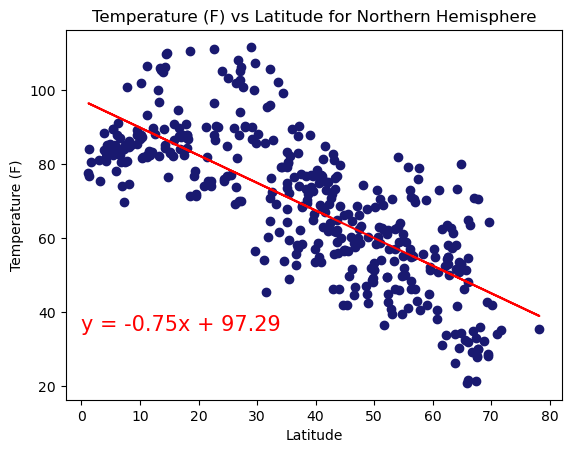

In [26]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plt.title("Temperature (F) vs Latitude for Northern Hemisphere")
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "midnightblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

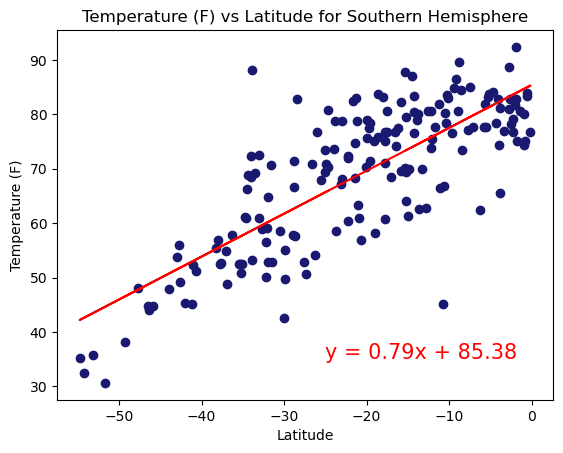

In [36]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

plt.title("Temperature (F) vs Latitude for Southern Hemisphere")
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="midnightblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

### Humidity vs. Latitude Linear Regression Plot

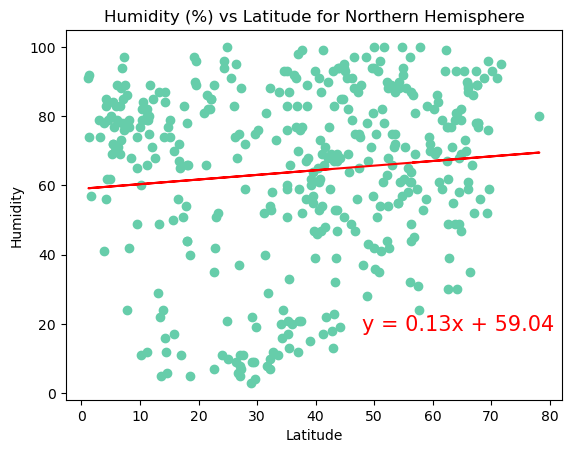

In [30]:
# Northern Hemisphere
# YOUR CODE HERE

plt.title("Humidity (%) vs Latitude for Northern Hemisphere")
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "mediumaquamarine")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


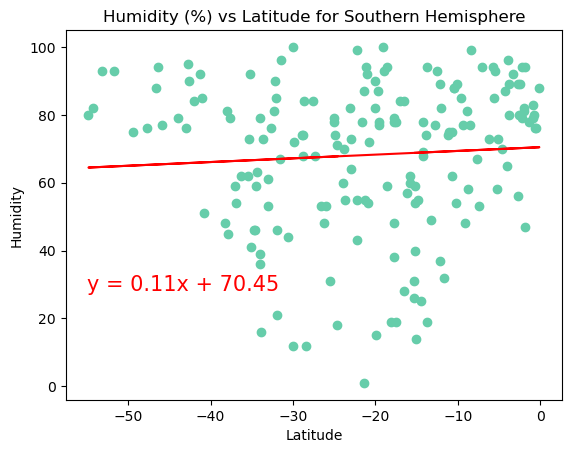

In [39]:
# Southern Hemisphere
# YOUR CODE HERE

plt.title("Humidity (%) vs Latitude for Southern Hemisphere")
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "mediumaquamarine")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


**Discussion about the linear relationship:** For cities that are below the equator, there appears a consistent trend of having high humidity.  Though not all cities fall under this trend, the bulk of them do.  This makes sense given that below the equator is more likely to have large bodies of water, which will ultimately impact the humidity of the cities that are nearest to it.  As you get into the northern hemisphere, the level of humidity is much more varied, but still seems to have a good portion of it's cities with humidity above 60%.

### Cloudiness vs. Latitude Linear Regression Plot

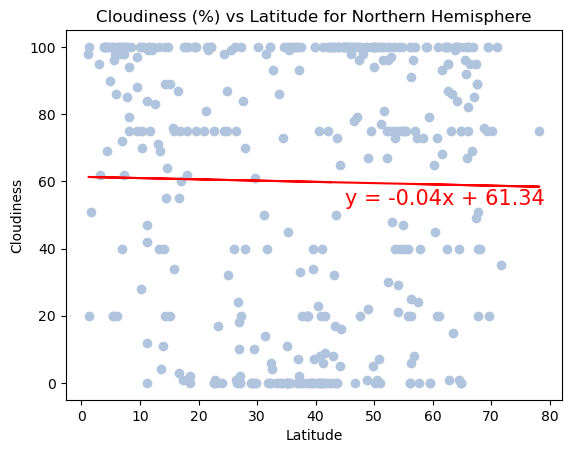

In [33]:
# Northern Hemisphere
# YOUR CODE HERE

plt.title("Cloudiness (%) vs Latitude for Northern Hemisphere")
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "lightsteelblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,53),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

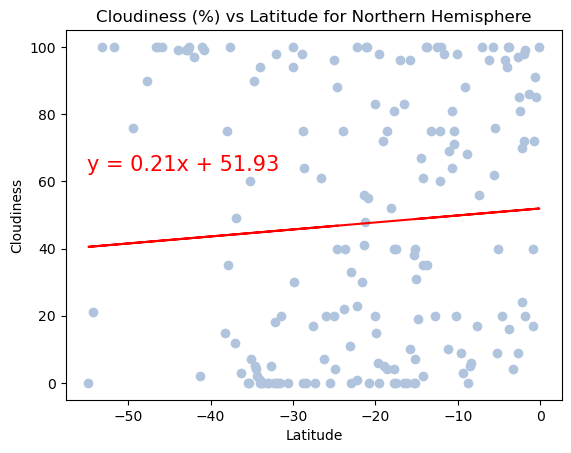

In [35]:
# Southern Hemisphere
# YOUR CODE HERE
plt.title("Cloudiness (%) vs Latitude for Northern Hemisphere")
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "lightsteelblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,63),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** There doesn't appear to be a strong correlation between cloudiness and longitude / latitude.  The linear regression line was only able to pull together about 2 to 3 points for both hemispheres.  This suggests that regardless of how close to the equator a city is, the level of cloud cover is unlikely to be affected.

### Wind Speed vs. Latitude Linear Regression Plot

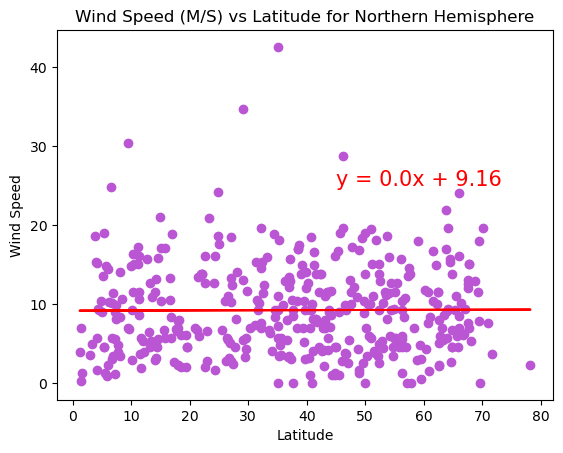

In [40]:
# Northern Hemisphere
# YOUR CODE HERE

plt.title("Wind Speed (M/S) vs Latitude for Northern Hemisphere")
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "mediumorchid")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


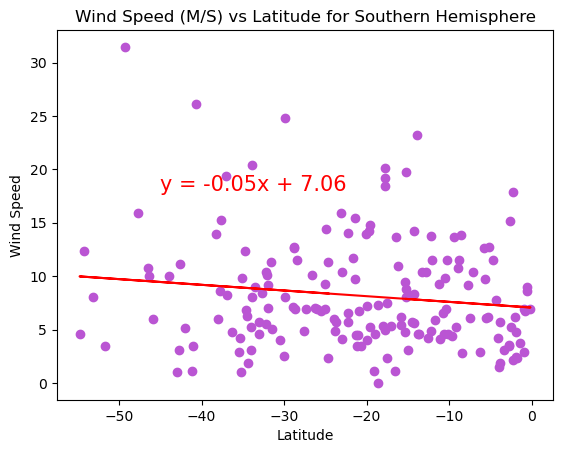

In [41]:
# Southern Hemisphere
# YOUR CODE HERE

plt.title("Wind Speed (M/S) vs Latitude for Southern Hemisphere")
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "mediumorchid")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** "There appears to be around 10 M/S winds as a city gets closer to the equator.  It would also appear that regardless of whether it is the north or southern hemisphere the bulk of the windspeeds will be under 15 M/S."